In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action = 'ignore' )

In [2]:
df = pd.read_csv('D:/DBDA_Official10/Machine_Learning/Machine_Learning/Assignment/Datasets/Claimants.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [4]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [12]:
x= df.drop(['ATTORNEY','SEATBELT','CLMSEX','CLMINSUR','CLMAGE'],axis=1)
y= df['ATTORNEY']

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state = 123456)

In [14]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(max_iter = 1000)

model.fit(x_train,y_train)

LogisticRegressionCV(max_iter=1000)

In [9]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


<Axes: >

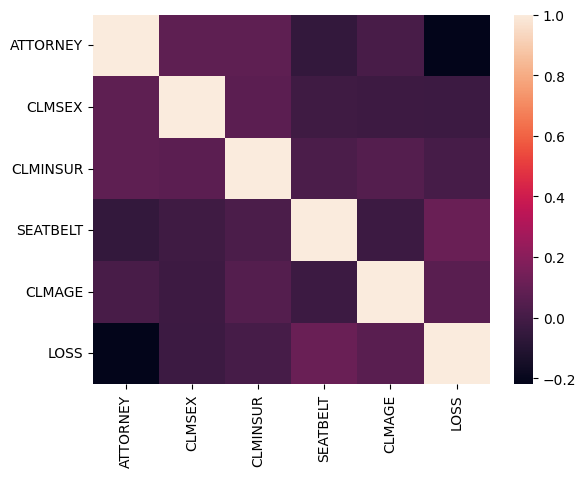

In [11]:
sns.heatmap(df.corr())

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [16]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 76,  65],
       [ 20, 107]])

In [17]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(accuracy,precision, recall)

0.6828358208955224 0.622093023255814 0.84251968503937
